In [1]:
import json
import pandas as pd
import seaborn as sns

In [2]:
train_json = open('train.json')
train_data = json.load(train_json)

In [ ]:
#some very impotant changes for the project
#Jamie 

In [3]:
train_data

[{'paperId': '0b341b6938308a6d5f47edf490f6e46eae3835fa',
  'title': 'Detecting linguistic idiosyncratic interests in autism using distributional semantic models',
  'authorId': '3188285',
  'authorName': 'Masoud Rouhizadeh',
  'abstract': 'Children with autism spectrum disorder often exhibit idiosyncratic patterns of behaviors and interests. In this paper, we focus on measuring the presence of idiosyncratic interests at the linguistic level in children with autism using distributional semantic models. We model the semantic space of children’s narratives by calculating pairwise word overlap, and we compare the overlap found within and across diagnostic groups. We find that the words used by children with typical development tend to be used by other children with typical development, while the words used by children with autism overlap less with those used by children with typical development and even less with those used by other children with autism. These findings suggest that childre

Data apears to have 7 features (Whose titles are pretty self explanatory):

- paperId
- authorId
- authorName (Dep. var)
- abstract
- year
- venue

Converting the json into a dataframe

In [4]:
train_df_raw = pd.read_json('train.json')
train_df_raw

,paperId,title,authorId,authorName,abstract,year,venue
0,0b341b6938308a6d5f47edf490f6e46eae3835fa,Detecting linguistic idiosyncratic interests i...,3188285,Masoud Rouhizadeh,Children with autism spectrum disorder often e...,2014,CLPsych@ACL
1,c682727ee058aadbe9dbf838dcb036322818f588,Bigrams and BiLSTMs Two Neural Networks for Se...,2782720,Yuri Bizzoni,We present and compare two alternative deep ne...,2018,Fig-Lang@NAACL-HLT
2,0f9b5b32229a7245e43754430c0c88f8e7f0d8af,In Factuality: Efficient Integration of Releva...,144748442,Peter Vickers,Visual Question Answering (VQA) methods aim at...,2021,ACL
3,7e8b4cfdc03b59ece2d6b33a217f0abd47f708d9,Variational Graph Autoencoding as Cheap Superv...,46331602,Irene Li,Coreference resolution over semantic graphs li...,2022,ACL
4,07588dd5d0252c7abc99b3834a81bf23741ead4b,LIMIT-BERT : Linguistics Informed Multi-Task BERT,30887404,Junru Zhou,"In this paper, we present Linguistics Informed...",2019,FINDINGS
...,...,...,...,...,...,...,...
12124,5868a7bfe6a4590d332ca66b8097dbe5490c8a73,SmBoP: Semi-autoregressive Bottom-up Semantic ...,2001128224,Ohad Rubin,The de-facto standard decoding method for sema...,2020,NAACL
12125,6fbfa7138235b99df43391bff3917b85393c3ca1,UW-Stanford System Description for AESW 2016 S...,3209288,D. Flickinger,This is a report on the methods used and resul...,2016,BEA@NAACL-HLT
12126,7226d14e6dea73dfad521256248ec2b19ae66ad8,From Raw Text to Enhanced Universal Dependenci...,144254013,G. Bouma,We describe the second IWPT task on end-to-end...,2021,IWPT
12127,cb0f3ee1e98faf92429d601cdcd76c69c1e484eb,Neural Network Acceptability Judgments,46236380,Alex Warstadt,Abstract This paper investigates the ability o...,2018,Transactions of the Association for Computatio...


A bit of EDA...

In [5]:
EDA0 = train_df_raw["paperId"].unique()
print(len(EDA0))

print('''Intuitively, paper IDs are all unique. Nº paper Ids = Nº rows''')
print('#############')

EDA1 = train_df_raw["authorId"].unique()
EDA11 = train_df_raw["authorId"].value_counts()
print(len(EDA1))
print(max(EDA11))
print(min(EDA11))

print('''There are 5625 different authors. The author with the most papers have 13, while the minimun registered number of paper per author is 1.''')
print('#############')

EDA2 = [int(i) for i in train_df_raw["year"].unique()]
EDA22 = train_df_raw["year"].value_counts()
EDA2.sort()
print(EDA2)

print('''Paper have been published in 44 different years between 1979 and 2022''')
print('#############')

EDA3 = train_df_raw.isna().values.any()
print(EDA3)

print('''Nicely cleansed data: no NaN values''')
print('#############')

12129
Intuitively, paper IDs are all unique. Nº paper Ids = Nº rows
#############
5625
13
1
There are 5625 different authors. The author with the most papers have 13, while the minimun registered number of paper per author is 1.
#############
[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Paper have been published in 44 different years between 1979 and 2022
#############
False
Nicely cleansed data: no NaN values
#############


### To do:
- Check the possible existence of outliers

### Ideas for the clasificator
- Try to relate authors to papers by keywords either in abstract or title (Re might be useful). To-do: Develop a method to extract keywords from titels and abstracts.
- Discriminate by venue. Each author probably presents papers in only one venue. Analogously from a venue we could infer that his author belongs to a list of those who have presented there.
- Year also seems to provide great opportunities for dicrimination. It might be a posibility that authors tend to concentrate their publications in a group of years relatively limited.
- Exploit the combinations between the previous three. Certain topics will be "trendier" in a given groups of years, Certain venues may only take place in given years etc.


### Dirty box

Crear un dataset en el que cada fila sea un autor, 

In [6]:
EDA11

1750769       13
1747849       13
51042088      12
2854981       12
3422953       11
              ..
40192974       1
2013172        1
2106294609     1
5677323        1
144928136      1
Name: authorId, Length: 5625, dtype: int64

<AxesSubplot:xlabel='authorId', ylabel='Count'>

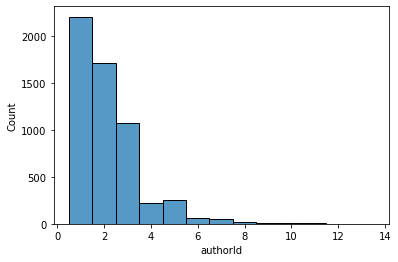

In [7]:
sns.histplot(data=EDA11, discrete=True)

In [8]:
EDA22

2019    1845
2021    1839
2020    1723
2018    1361
2016    1014
2017    1000
2015     901
2014     800
2022     396
2002     115
1998     112
2000      98
2003      91
1997      67
2005      64
2006      56
1996      48
2004      48
1992      40
2013      38
1984      38
2001      38
1994      35
1999      35
1983      28
1993      28
1995      27
1988      24
1991      24
2011      20
2010      18
1982      17
1981      16
1990      15
1985      14
1986      13
1987      12
1989      12
2008      11
2009      11
2007      10
2012      10
1980      10
1979       7
Name: year, dtype: int64

<AxesSubplot:ylabel='Count'>

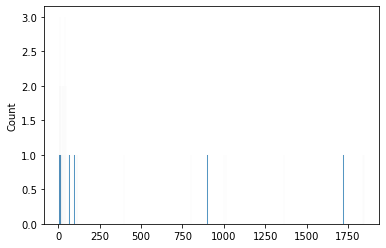

In [9]:
sns.histplot(data=list(EDA22), discrete=True)

In [10]:
len(train_df_raw["venue"].unique())

362

In [1]:
#Creating an ordered list of most frequent filtered words in the abstracts

import json
import re
from nltk.corpus import stopwords

# Opening JSON file, and returning the object as a list of dictionaries. Reminder: it's loading from my local path.
f = open('C:/Users/Jamie/Downloads/train.json',)
data = json.load(f)

# Creating a list with all the abstracts in it
# Also cleaning everything into lower case and only alphanumerical
# Change the 'abstract' to 'title' to get the information about the titles
X = []
for item in data:
    abstract = item.get('abstract')
    abstract = re.sub("[^a-zA-Z0-9 ]","",abstract)
    X.append(abstract.lower())

# Creating a list of all the words 
word_list = [word for line in X for word in line.split()]    

# Removing common irrelevant words from the word_list
stop_words = set(stopwords.words('english'))
word_list = [w for w in word_list if not w.lower() in stop_words]

filtered_sentence = []
  
for w in word_list:
    if w not in stop_words:
        filtered_sentence.append(w)

# Turning that into a frequency dictionary
frequency_list = {}
for word in filtered_sentence:
    if word not in frequency_list:
        frequency_list[word] = 0
    frequency_list[word] += 1

# And into an ordered dictionary, ordered on the frequency count
# The dictionary is currently limited to words which occur 1.000 times or more. This can be altered.
# This is then turnt into a list, so that we can refer to indexnumbers for variables
ordered = dict(sorted(frequency_list.items(), key=lambda item: item[1],reverse=True))
orderedDict = {k:v for (k,v) in ordered.items() if v > 1000}
orderedListAbstracts = []
for item in orderedDict:
    orderedListAbstracts.append(item)

In [2]:
#Creating an ordered list of most frequent filtered words in the Titles

import json
import re
from nltk.corpus import stopwords

# Opening JSON file, and returning the object as a list of dictionaries. Reminder: it's loading from my local path.
f = open('C:/Users/Jamie/Downloads/train.json',)
data = json.load(f)

# Creating a list with all the titles in it
# Also cleaning everything into lower case and only alphanumerical
# Change the 'title' to 'abstract' to get the information about the abstracts
X = []
for item in data:
    title = item.get('title')
    title = re.sub("[^a-zA-Z0-9 ]","",title)
    X.append(title.lower())

# Creating a list of all the words 
word_list = [word for line in X for word in line.split()]    

# Removing common irrelevant words from the word_list
stop_words = set(stopwords.words('english'))
word_list = [w for w in word_list if not w.lower() in stop_words]

filtered_sentence = []
  
for w in word_list:
    if w not in stop_words:
        filtered_sentence.append(w)

# Turning that into a frequency dictionary
frequency_list = {}
for word in filtered_sentence:
    if word not in frequency_list:
        frequency_list[word] = 0
    frequency_list[word] += 1

# And into an ordered dictionary, ordered on the frequency count
# The dictionary is currently limited to words which occur 100 times or more. This can be altered.
# This is then turnt into a list, so that we can refer to indexnumbers for variables
ordered = dict(sorted(frequency_list.items(), key=lambda item: item[1],reverse=True))
orderedDict = {k:v for (k,v) in ordered.items() if v > 100}
orderedListTitles = []
for item in orderedDict:
    orderedListTitles.append(item)

In [6]:
x = len(orderedListTitles)
y = len(orderedListAbstracts)

print(x, y, orderedListTitles[0:10], orderedListAbstracts[0:10])

138 140 ['language', 'learning', 'neural', 'translation', 'using', 'task', 'machine', 'models', 'word', 'text'] ['model', 'models', 'language', 'task', 'data', 'paper', 'show', 'results', 'system', 'performance']
